In [1]:
!python -V

Python 3.11.5


In [2]:
import pandas as pd

In [3]:
pd.__version__

'2.1.0'

In [4]:
import sklearn

In [5]:
sklearn.__version__

'1.4.1.post1'

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import pickle

In [8]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [9]:
yellow_df = pd.read_parquet('/datasets/dtc/yellow_tripdata_2023-01.parquet')

In [10]:
yellow_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [11]:
green_df = pd.read_parquet('/datasets/dtc/green_tripdata_2021-01.parquet')

In [12]:
green_df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,0.5,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,0.5,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,0.5,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,0.5,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,0.0,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00


In [13]:
df = green_df[green_df.trip_type == 2]

In [14]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
6,2,2021-01-01 00:19:14,2021-01-01 00:19:21,N,5.0,265,265,1.0,0.00,180.0,0.0,0.0,36.06,0.0,None,0.3,216.36,1.0,2.0,0.0
15,2,2021-01-01 00:29:05,2021-01-01 00:29:07,N,5.0,42,264,1.0,0.00,10.0,0.0,0.0,2.06,0.0,None,0.3,12.36,1.0,2.0,0.0
30,2,2021-01-01 00:35:29,2021-01-01 00:55:15,N,5.0,74,247,1.0,3.64,13.0,0.0,0.0,0.00,0.0,None,0.3,13.30,2.0,2.0,0.0
43,2,2021-01-01 23:12:41,2021-01-02 01:13:53,N,5.0,95,82,1.0,0.00,9.7,0.0,0.0,2.00,0.0,None,0.3,12.00,1.0,2.0,0.0
45,2,2021-01-01 01:49:29,2021-01-01 01:49:33,N,5.0,244,244,5.0,0.02,12.0,0.0,0.0,2.46,0.0,None,0.3,14.76,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40363,2,2021-01-31 19:26:20,2021-01-31 19:35:47,N,5.0,167,248,2.0,1.31,10.0,0.0,0.0,0.00,0.0,None,0.3,10.30,2.0,2.0,0.0
40364,2,2021-01-31 19:44:54,2021-01-31 20:19:56,N,5.0,147,147,2.0,6.97,30.0,0.0,0.0,0.00,0.0,None,0.3,30.30,2.0,2.0,0.0
40377,2,2021-01-31 20:09:41,2021-01-31 20:10:21,N,5.0,95,95,1.0,0.00,15.0,0.0,0.0,3.06,0.0,None,0.3,18.36,1.0,2.0,0.0
40394,2,2021-01-31 20:38:42,2021-01-31 20:38:45,N,5.0,75,264,1.0,0.00,5.0,0.0,0.0,0.20,0.0,None,0.3,5.50,1.0,2.0,0.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1238 entries, 6 to 40430
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               1238 non-null   int64         
 1   lpep_pickup_datetime   1238 non-null   datetime64[us]
 2   lpep_dropoff_datetime  1238 non-null   datetime64[us]
 3   store_and_fwd_flag     1238 non-null   object        
 4   RatecodeID             1238 non-null   float64       
 5   PULocationID           1238 non-null   int64         
 6   DOLocationID           1238 non-null   int64         
 7   passenger_count        1238 non-null   float64       
 8   trip_distance          1238 non-null   float64       
 9   fare_amount            1238 non-null   float64       
 10  extra                  1238 non-null   float64       
 11  mta_tax                1238 non-null   float64       
 12  tip_amount             1238 non-null   float64       
 13  tolls_a

# Load and Prepare Data

In [16]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    td = df.duration.iloc[0]
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    
    df = df[(df.duration >=1) & (df.duration <=60)]
    
    categorical = ['PULocationID', 'DOLocationID']
    #numerical = ['trip_distance']
    
    df[categorical] = df[categorical].astype(str)

    return df

In [17]:
df_train = read_dataframe('/datasets/dtc/green_tripdata_2021-01.parquet')
df_val = read_dataframe('/datasets/dtc/green_tripdata_2021-02.parquet')

In [18]:
len(df_train), len(df_val)

(73908, 61921)

In [19]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
td = df.duration.iloc[0]
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

C:\Users\Cokroaminoto\AppData\Local\Temp\ipykernel_984\2997797082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
C:\Users\Cokroaminoto\AppData\Local\Temp\ipykernel_984\2997797082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)


In [20]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
6,2,2021-01-01 00:19:14,2021-01-01 00:19:21,N,5.0,265,265,1.0,0.00,180.0,...,0.0,36.06,0.0,None,0.3,216.36,1.0,2.0,0.0,0.116667
15,2,2021-01-01 00:29:05,2021-01-01 00:29:07,N,5.0,42,264,1.0,0.00,10.0,...,0.0,2.06,0.0,None,0.3,12.36,1.0,2.0,0.0,0.033333
30,2,2021-01-01 00:35:29,2021-01-01 00:55:15,N,5.0,74,247,1.0,3.64,13.0,...,0.0,0.00,0.0,None,0.3,13.30,2.0,2.0,0.0,19.766667
43,2,2021-01-01 23:12:41,2021-01-02 01:13:53,N,5.0,95,82,1.0,0.00,9.7,...,0.0,2.00,0.0,None,0.3,12.00,1.0,2.0,0.0,121.200000
45,2,2021-01-01 01:49:29,2021-01-01 01:49:33,N,5.0,244,244,5.0,0.02,12.0,...,0.0,2.46,0.0,None,0.3,14.76,1.0,2.0,0.0,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40363,2,2021-01-31 19:26:20,2021-01-31 19:35:47,N,5.0,167,248,2.0,1.31,10.0,...,0.0,0.00,0.0,None,0.3,10.30,2.0,2.0,0.0,9.450000
40364,2,2021-01-31 19:44:54,2021-01-31 20:19:56,N,5.0,147,147,2.0,6.97,30.0,...,0.0,0.00,0.0,None,0.3,30.30,2.0,2.0,0.0,35.033333
40377,2,2021-01-31 20:09:41,2021-01-31 20:10:21,N,5.0,95,95,1.0,0.00,15.0,...,0.0,3.06,0.0,None,0.3,18.36,1.0,2.0,0.0,0.666667
40394,2,2021-01-31 20:38:42,2021-01-31 20:38:45,N,5.0,75,264,1.0,0.00,5.0,...,0.0,0.20,0.0,None,0.3,5.50,1.0,2.0,0.0,0.050000


C:\Users\Cokroaminoto\AppData\Local\Temp\ipykernel_984\3426635498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

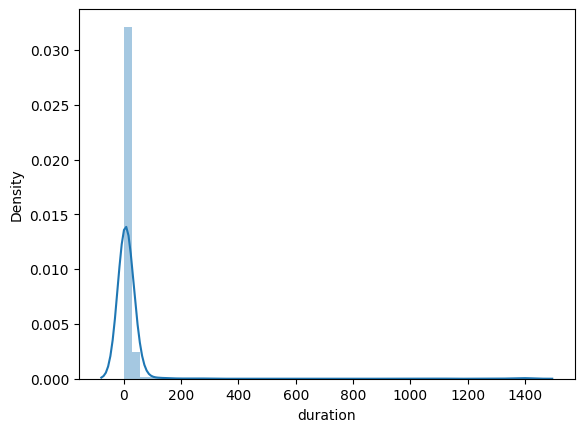

In [21]:
sns.distplot(df.duration)

In [22]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    1238.000000
mean       18.305493
std       108.364382
min         0.000000
50%         1.666667
95%        35.604167
98%        59.339333
99%       149.837833
max      1416.100000
Name: duration, dtype: float64

In [23]:
df = df[(df.duration >=1) & (df.duration <=60)]

In [24]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
30,2,2021-01-01 00:35:29,2021-01-01 00:55:15,N,5.0,74,247,1.0,3.64,13.0,...,0.0,0.0,0.0,None,0.3,13.3,2.0,2.0,0.0,19.766667
53,2,2021-01-01 01:54:51,2021-01-01 02:15:35,N,5.0,74,94,1.0,5.82,18.0,...,0.0,0.0,0.0,None,0.3,18.3,2.0,2.0,0.0,20.733333
69,2,2021-01-01 02:42:49,2021-01-01 02:50:59,N,5.0,136,241,1.0,0.57,9.0,...,0.0,0.0,0.0,None,0.3,9.3,2.0,2.0,0.0,8.166667
88,2,2021-01-01 04:52:02,2021-01-01 05:05:01,N,5.0,247,75,1.0,3.43,15.0,...,0.0,0.0,0.0,None,0.3,15.3,2.0,2.0,0.0,12.983333
96,2,2021-01-01 05:52:43,2021-01-01 05:58:02,N,5.0,7,7,1.0,0.65,50.0,...,0.0,7.0,0.0,None,0.3,57.3,1.0,2.0,0.0,5.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40324,2,2021-01-31 18:42:52,2021-01-31 19:08:44,N,5.0,69,213,2.0,5.40,16.0,...,0.0,0.0,0.0,None,0.3,16.3,2.0,2.0,0.0,25.866667
40352,1,2021-01-31 19:32:22,2021-01-31 19:50:16,N,5.0,82,129,2.0,2.40,0.0,...,0.0,0.0,0.0,None,0.0,0.0,2.0,2.0,0.0,17.900000
40363,2,2021-01-31 19:26:20,2021-01-31 19:35:47,N,5.0,167,248,2.0,1.31,10.0,...,0.0,0.0,0.0,None,0.3,10.3,2.0,2.0,0.0,9.450000
40364,2,2021-01-31 19:44:54,2021-01-31 20:19:56,N,5.0,147,147,2.0,6.97,30.0,...,0.0,0.0,0.0,None,0.3,30.3,2.0,2.0,0.0,35.033333


In [25]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [26]:
df[categorical].dtypes

PULocationID    int64
DOLocationID    int64
dtype: object

In [27]:
df[categorical] = df[categorical].astype(str)

C:\Users\Cokroaminoto\AppData\Local\Temp\ipykernel_984\1767203464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


In [28]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                     object
DOLocationID                     object
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
duration                        float64
dtype: object

In [29]:
df[categorical + numerical].iloc[:10].to_dict(orient='records')

[{'PULocationID': '74', 'DOLocationID': '247', 'trip_distance': 3.64},
 {'PULocationID': '74', 'DOLocationID': '94', 'trip_distance': 5.82},
 {'PULocationID': '136', 'DOLocationID': '241', 'trip_distance': 0.57},
 {'PULocationID': '247', 'DOLocationID': '75', 'trip_distance': 3.43},
 {'PULocationID': '7', 'DOLocationID': '7', 'trip_distance': 0.65},
 {'PULocationID': '152', 'DOLocationID': '152', 'trip_distance': 0.1},
 {'PULocationID': '159', 'DOLocationID': '159', 'trip_distance': 0.27},
 {'PULocationID': '116', 'DOLocationID': '247', 'trip_distance': 1.21},
 {'PULocationID': '195', 'DOLocationID': '106', 'trip_distance': 0.49},
 {'PULocationID': '74', 'DOLocationID': '236', 'trip_distance': 2.12}]

In [30]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [31]:
df_train.shape, df_val.shape

((73908, 21), (61921, 21))

In [32]:
df_train['PU_DO'] = df_train['PULocationID'] + ' ' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + ' ' + df_val['DOLocationID']

In [33]:
df_val

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration,PU_DO
0,2,2021-02-01 00:34:03,2021-02-01 00:51:58,N,1.0,130,205,5.0,3.66,14.00,...,10.00,0.0,None,0.3,25.30,1.0,1.0,0.00,17.916667,130 205
1,2,2021-02-01 00:04:00,2021-02-01 00:10:30,N,1.0,152,244,1.0,1.10,6.50,...,0.00,0.0,None,0.3,7.80,2.0,1.0,0.00,6.500000,152 244
2,2,2021-02-01 00:18:51,2021-02-01 00:34:06,N,1.0,152,48,1.0,4.93,16.50,...,0.00,0.0,None,0.3,20.55,2.0,1.0,2.75,15.250000,152 48
3,2,2021-02-01 00:53:27,2021-02-01 01:11:41,N,1.0,152,241,1.0,6.70,21.00,...,0.00,0.0,None,0.3,22.30,2.0,1.0,0.00,18.233333,152 241
4,2,2021-02-01 00:57:46,2021-02-01 01:06:44,N,1.0,75,42,1.0,1.89,8.50,...,2.45,0.0,None,0.3,12.25,1.0,1.0,0.00,8.966667,75 42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64567,2,2021-02-28 22:19:00,2021-02-28 22:29:00,None,NaN,129,7,NaN,2.63,10.04,...,0.00,0.0,None,0.3,10.34,NaN,NaN,NaN,10.000000,129 7
64568,2,2021-02-28 23:18:00,2021-02-28 23:27:00,None,NaN,116,166,NaN,1.87,8.33,...,1.89,0.0,None,0.3,10.52,NaN,NaN,NaN,9.000000,116 166
64569,2,2021-02-28 23:44:00,2021-02-28 23:58:00,None,NaN,74,151,NaN,2.40,12.61,...,0.00,0.0,None,0.3,12.91,NaN,NaN,NaN,14.000000,74 151
64570,2,2021-02-28 23:07:00,2021-02-28 23:14:00,None,NaN,42,42,NaN,1.11,11.95,...,0.00,0.0,None,0.3,15.00,NaN,NaN,NaN,7.000000,42 42


# Vectorize

In [34]:
categorical = ['PU_DO'] #['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [35]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

# Train

In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

C:\Users\Cokroaminoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.758715200910705

In [37]:
ls = Lasso() #(alpha=0.001)
ls.fit(X_train, y_train)

y_pred = ls.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

C:\Users\Cokroaminoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


12.212583224318818

In [38]:
rg = Ridge()
rg.fit(X_train, y_train)

y_pred = rg.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

C:\Users\Cokroaminoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.7037351559552585

In [39]:
import os

# Create directories if they don't exist
os.makedirs('/models/', exist_ok=True)  # Create all subdirectories

with open('/models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

from IPython import get_ipython

# Assuming your script is in the same directory as the 'models' folder
current_dir = get_ipython().run_line_magic('run', '-i "%s"' % __file__)
models_dir = os.path.join(current_dir, 'models')

os.makedirs(models_dir, exist_ok=True)

with open(os.path.join(models_dir, 'lin_reg.bin'), 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [42]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [43]:
X_train

<73908x13221 sparse matrix of type '<class 'numpy.float64'>'
	with 147816 stored elements in Compressed Sparse Row format>

In [44]:
dv.feature_names_

['PU_DO=10 10',
 'PU_DO=10 101',
 'PU_DO=10 113',
 'PU_DO=10 117',
 'PU_DO=10 119',
 'PU_DO=10 121',
 'PU_DO=10 122',
 'PU_DO=10 128',
 'PU_DO=10 129',
 'PU_DO=10 130',
 'PU_DO=10 131',
 'PU_DO=10 134',
 'PU_DO=10 136',
 'PU_DO=10 139',
 'PU_DO=10 140',
 'PU_DO=10 145',
 'PU_DO=10 148',
 'PU_DO=10 15',
 'PU_DO=10 150',
 'PU_DO=10 155',
 'PU_DO=10 161',
 'PU_DO=10 168',
 'PU_DO=10 17',
 'PU_DO=10 170',
 'PU_DO=10 174',
 'PU_DO=10 18',
 'PU_DO=10 180',
 'PU_DO=10 186',
 'PU_DO=10 19',
 'PU_DO=10 191',
 'PU_DO=10 192',
 'PU_DO=10 193',
 'PU_DO=10 194',
 'PU_DO=10 195',
 'PU_DO=10 196',
 'PU_DO=10 197',
 'PU_DO=10 198',
 'PU_DO=10 2',
 'PU_DO=10 205',
 'PU_DO=10 215',
 'PU_DO=10 216',
 'PU_DO=10 217',
 'PU_DO=10 218',
 'PU_DO=10 219',
 'PU_DO=10 223',
 'PU_DO=10 225',
 'PU_DO=10 226',
 'PU_DO=10 231',
 'PU_DO=10 233',
 'PU_DO=10 237',
 'PU_DO=10 242',
 'PU_DO=10 243',
 'PU_DO=10 248',
 'PU_DO=10 254',
 'PU_DO=10 257',
 'PU_DO=10 258',
 'PU_DO=10 263',
 'PU_DO=10 265',
 'PU_DO=10 28',
 'PU_

In [45]:
target = 'duration'
y_train = df[target].values

In [46]:
y_train

array([19.76666667, 20.73333333,  8.16666667, 12.98333333,  5.31666667,
        1.26666667,  1.6       ,  5.03333333,  1.86666667,  6.38333333,
       34.71666667,  1.35      , 27.23333333,  9.11666667, 26.23333333,
       28.75      , 22.01666667, 21.85      , 20.96666667, 21.61666667,
        9.26666667, 22.63333333, 25.41666667,  1.2       , 16.7       ,
       49.2       ,  7.35      , 14.16666667, 13.58333333, 24.06666667,
       24.2       , 27.21666667, 19.61666667, 12.71666667, 18.83333333,
        6.26666667,  2.53333333, 13.26666667,  7.63333333, 54.71666667,
        3.75      ,  4.15      ,  3.65      , 10.26666667,  5.6       ,
        2.93333333, 33.95      ,  6.53333333, 10.08333333, 21.96666667,
       30.96666667,  5.78333333, 11.05      ,  7.35      , 18.15      ,
       10.25      ,  1.95      ,  1.95      , 38.2       , 12.3       ,
       14.03333333, 16.91666667,  3.83333333, 14.31666667,  7.01666667,
       19.56666667,  6.41666667, 38.48333333, 34.98333333, 10.38

In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [73908, 640]

In [ ]:
y_pred = lr.predict(X_train)

In [ ]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [ ]:
mean_squared_error(y_train, y_pred, squared=False)

In [ ]:
ls = Lasso()
ls.fit(X_train, y_train)

y_pred = ls.predict(X_train)

In [ ]:
mean_squared_error(y_train, y_pred, squared=False)